In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import yaml
from natsort import natsorted
from PIL.Image import Image as im

In [150]:
df_results = pd.DataFrame(
        columns={'method', 'scale', 'image_size', 'loss', 'test_mae', 'test_mse', 'train_mae', 'train_mse', 'val_mae', 'val_mse'})

In [151]:
# List the results files
color_result_files = glob.glob("color_results/sasnet*.yaml")
compressed_result_files = glob.glob("compressed_results/sasnet*.yaml")
resized_result_files = natsorted(glob.glob("resized_results/sasnet*.yaml"))
resized_alg_files = natsorted(glob.glob('resized_alg_results/sasnet*.yaml'))

original_size = 2359.296

In [152]:
# Add all the results to dataframe
for f in color_result_files:
    with open(f, "r") as stream:
        single_result = yaml.load(stream, Loader=yaml.SafeLoader)
    single_result['method'] = 'color'
    single_result['scale'] = None
    single_result['image_size'] = 768.432
    df_results = df_results.append(single_result, ignore_index=True)

/tmp/ipykernel_192/3047836068.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(single_result, ignore_index=True)


In [153]:
# Add all the results to dataframe
with open('compressed_results/image_sizes.yaml', "r") as stream:
    compressed_sizes = yaml.load(stream, Loader=yaml.SafeLoader)
    compressed_sizes.reverse()
for i, f in enumerate(compressed_result_files):
    s = f.split('_')
    compression = float(s[4])
    with open(f, "r") as stream:
        single_result = yaml.load(stream, Loader=yaml.SafeLoader)
    single_result['method'] = 'compression'
    single_result['scale'] = compression * 100
    single_result['image_size'] = compressed_sizes[i] / 1000
    df_results = df_results.append(single_result, ignore_index=True)

/tmp/ipykernel_192/1058979789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(single_result, ignore_index=True)
/tmp/ipykernel_192/1058979789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(single_result, ignore_index=True)
/tmp/ipykernel_192/1058979789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(single_result, ignore_index=True)
/tmp/ipykernel_192/1058979789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(single_result, ignore_index=True)
/tmp/ipykernel_192/1058979789.py:13: FutureWarning: 

In [154]:
# Add all the results to dataframe
with open('resized_results/image_sizes.yaml', "r") as stream:
    resized_sizes = yaml.load(stream, Loader=yaml.SafeLoader)
    resized_sizes.reverse()
for i, f in enumerate(resized_result_files):
    s = f.split('_')
    scale = float(s[2])
    with open(f, "r") as stream:
        single_result = yaml.load(stream, Loader=yaml.SafeLoader)
    single_result['method'] = 'resize'
    single_result['scale'] = scale
    single_result['image_size'] = resized_sizes[i]
    df_results = df_results.append(single_result, ignore_index=True)

original_result = {'method': 'resize',
                   'scale': 1,
                   'image_size': original_size,
                   'test_mae': 6.35,
                   'test_mse': 9.9}
df_results = df_results.append(original_result, ignore_index=True)

/tmp/ipykernel_192/2740551548.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(single_result, ignore_index=True)
/tmp/ipykernel_192/2740551548.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(single_result, ignore_index=True)
/tmp/ipykernel_192/2740551548.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(single_result, ignore_index=True)
/tmp/ipykernel_192/2740551548.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(single_result, ignore_index=True)
/tmp/ipykernel_192/2740551548.py:13: FutureWarning: 

In [155]:
overleaf_results = df_results[['method', 'scale', 'test_mae', 'test_mse', 'image_size']]
overleaf_results['image_size'] = overleaf_results['image_size'] / original_size * 100
overleaf_compression = np.round(overleaf_results, decimals=2)
print(overleaf_compression)
# df_results.to_csv('Results.csv')

         method  scale  test_mae  test_mse  image_size
0         color    NaN      7.92     12.25       32.57
1   compression    5.0     13.67     21.17        1.52
2   compression   10.0     10.07     18.11        2.20
3   compression   15.0      8.10     13.57        2.70
4   compression   20.0      7.29     11.93        3.24
5   compression   25.0      7.14     11.43        3.86
6   compression   30.0      6.80     10.83        4.26
7   compression   35.0      6.86     10.83        4.44
8   compression   40.0      6.91     10.61        4.68
9   compression   45.0      6.83     10.91        4.92
10  compression   50.0      6.83     10.50        6.28
11  compression   55.0      6.57     10.56        6.91
12  compression   60.0      6.40     10.23        7.13
13  compression   65.0      6.58     10.29        7.40
14  compression   70.0      6.37     10.04        7.83
15  compression   75.0      6.52      9.94        8.20
16       resize   10.0     39.90     59.14        0.99
17       r

/tmp/ipykernel_192/3256719418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overleaf_results['image_size'] = overleaf_results['image_size'] / original_size * 100


In [156]:
df_resized_alg = pd.DataFrame(
        columns={'method', 'scale', 'image_size', 'loss', 'test_mae', 'test_mse', 'train_mae', 'train_mse', 'val_mae', 'val_mse'})

for i, f in enumerate(resized_alg_files):
    s = f.split('_')
    scale = float(s[3])
    with open(f, "r") as stream:
        single_result = yaml.load(stream, Loader=yaml.SafeLoader)
    single_result['method'] = s[4]
    single_result['scale'] = scale
    df_resized_alg = df_resized_alg.append(single_result, ignore_index=True)

/tmp/ipykernel_192/2485603508.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_resized_alg = df_resized_alg.append(single_result, ignore_index=True)
/tmp/ipykernel_192/2485603508.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_resized_alg = df_resized_alg.append(single_result, ignore_index=True)
/tmp/ipykernel_192/2485603508.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_resized_alg = df_resized_alg.append(single_result, ignore_index=True)
/tmp/ipykernel_192/2485603508.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_resized_alg = df_resized_alg.append(single_result, ignore_index=True)
/tmp/ipykernel_192/2

In [157]:
overleaf_resize_algs = df_resized_alg[['method', 'scale', 'test_mae', 'test_mse', 'image_size']]
overleaf_resize_algs['image_size'] = overleaf_resize_algs['image_size'] / original_size * 100
overleaf_resize_algs = np.round(overleaf_resize_algs, decimals=2)
print(overleaf_resize_algs)

     method  scale  test_mae  test_mse image_size
0   bicubic   30.0     19.11     30.37        NaN
1  bilinear   30.0     16.62     26.73        NaN
2   lanczos   30.0     18.87     30.12        NaN
3   nearest   30.0     18.34     27.86        NaN
4   bicubic   60.0     10.88     19.54        NaN
5  bilinear   60.0     10.34     18.82        NaN
6   lanczos   60.0     10.45     18.10        NaN
7   nearest   60.0     10.74     18.63        NaN


/tmp/ipykernel_192/2368259476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overleaf_resize_algs['image_size'] = overleaf_resize_algs['image_size'] / original_size * 100


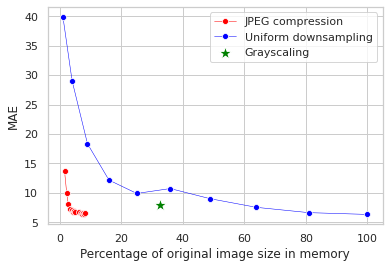

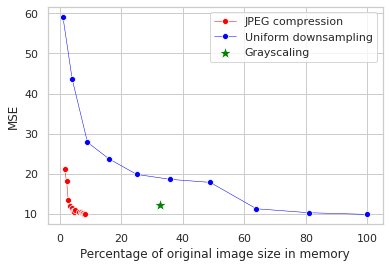

In [158]:
# %matplotlib qt
# Plot the compression results
sns.set_context('paper')
sns.set_theme(style='whitegrid')

df_compression = df_results.loc[df_results['method'] == 'compression']
df_resize = df_results.loc[df_results['method'] == 'resize']
df_color = df_results.loc[df_results['method'] == 'color']

figure, ax1 = plt.subplots()
ax1 = sns.lineplot(x=df_compression['image_size'] / original_size * 100,
         y=df_compression['test_mae'],
         linewidth=0.5,
         zorder=1,
         color='red',
         marker='o',
         label="JPEG compression")

ax1= sns.lineplot(x=df_resize['image_size'] / original_size * 100,
         y=df_resize['test_mae'],
         linewidth=0.5,
         zorder=1,
         color='blue',
         marker='o',
         label="Uniform downsampling")

ax1 = sns.scatterplot(x=df_color['image_size'] / original_size * 100,
            y=df_color['test_mae'][0],
            marker="*",
            s=200,
            color='green',
            label='Grayscaling')
plt.legend()
ax1.set_ylabel('MAE')
ax1.set_xlabel('Percentage of original image size in memory')
plt.savefig('mae_plot.png', dpi=300)

figure_2, ax2 = plt.subplots()
ax2 = sns.lineplot(x=df_compression['image_size'] / original_size * 100,
         y=df_compression['test_mse'],
         linewidth=0.5,
         zorder=1,
         color='red',
         marker='o',
         label="JPEG compression")

ax2 = sns.lineplot(x=df_resize['image_size'] / original_size * 100,
         y=df_resize['test_mse'],
         linewidth=0.5,
         zorder=1,
         color='blue',
         marker='o',
         label="Uniform downsampling")

ax2 = sns.scatterplot(x=df_color['image_size'] / original_size * 100,
            y=df_color['test_mse'][0],
            marker="*",
            s=200,
            color='green',
            label='Grayscaling')
plt.legend()
ax2.set_ylabel('MSE')
ax2.set_xlabel('Percentage of original image size in memory')
plt.savefig('mse_plot.png', dpi=300)